In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc,cm
import matplotlib
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
rc('font',**{'family':'serif','serif':['Palatino']})
rc('font',**{'size':11})
rc('text', usetex=True)
############################################################

def load_and_plot_data_distributions():

    data_training = np.load('data_output/scaled_features.npz')
    data_real = np.load('data_output/wavy_n_features.npz')
    features_training = data_training['features_scaled']
    channel_data = data_training['channel_data']
    features_real = data_real['features_scaled']
    n_opt = data_real['n_opt']


    return features_training, channel_data, features_real, n_opt

def plot_data_distributions(features_training, features_real, channel_data, saveExt=''):
    # overplot the real, synthetic feature distributions

    plt.close(saveExt)
    fig, axs = plt.subplots(3,2,figsize=(6,10),tight_layout=True,sharex=True,num=saveExt)

    axs = axs.flatten()

    feature_names = [r'$\Delta||\mathcal{F}||$', r'$\Delta \sin\angle\mathcal{F}$', \
                     r'$\Delta \cos\angle\mathcal{F}$', r'$\Delta\theta$',r'$\Delta\phi$']
    for i in range(5):
        # Loop over real data samples
        for ind, feat in enumerate(features_real):
            axs[i].plot(feat[:,i], c=plt.get_cmap('tab10')(0),\
                         label='Real Data' if (i==0) and (ind==0) else None, alpha=0.7)

        # Loop over synthetic samples
        for ind,feat in enumerate(features_training):
            #channel_data[ind],
            axs[i].plot(feat[:,i], c=plt.get_cmap('tab10')(1), \
                        label='Synthetic Data' if (i==0) and (ind==0) else None, alpha=0.3)

        axs[i].set_ylabel(feature_names[i])
        if i==0: axs[i].legend()
        axs[i].grid()
    
    # axs[-1].set_xlabel('Sensor Index')
    axs[-2].set_xlabel('Sensor Index')

    fig.savefig('output_plots/Feature_Distributions_Real_vs_Synthetic'+saveExt+'.pdf',transparent=True)
    print(f'Saved figure to: {'output_plots/Feature_Distributions_Real_vs_Synthetic'+saveExt+'.pdf'}')
    plt.show()



    

Saved figure to: output_plots/Feature_Distributions_Real_vs_Synthetic_Real_vs_Synthetic_4-3.pdf


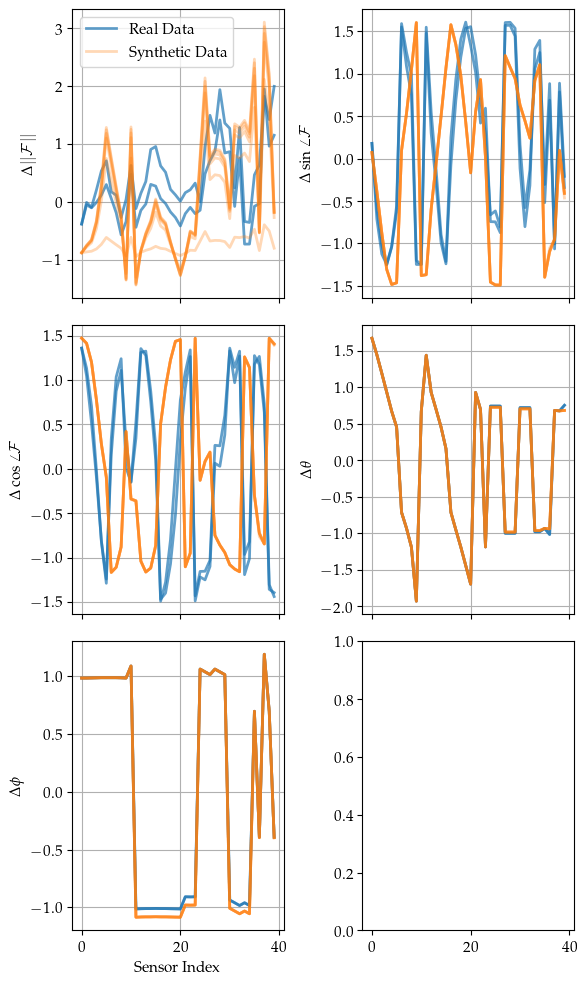

Loaded and plotted data distributions


In [2]:
############################################################
features_training, channel_data, features_real, n_opt = load_and_plot_data_distributions()
# plot_data_distributions(features_training, features_real, channel_data, saveExt='_Real_vs_Synthetic')
############################################################

plot_data_distributions(features_training, features_real, channel_data, saveExt='_Real_vs_Synthetic_4-3')


print('Loaded and plotted data distributions')